In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
from scipy import stats
from env import get_db_url

# Hypothesis Testing

### Exercises
For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

**Has the network latency gone up since we switched internet service providers?**

* **H<sub>0</sub>:** The internet service provider does NOT affect the network latency

* **H<sub>1</sub>:** The internet service provider does affect the network latency

* **True Positive:** The internet service provider does affect the network latency, & we were correct

* **True Negative:** The internet service provider does NOT affect the network latency, & we were correct

* **Type I:** The internet service provider does affect the network latency, & we were WRONG

* **Type II:** The internet service provider does NOT affect the network latency, & we were WRONG

**Is the website redesign any good?**

* **H<sub>0</sub>:** The redesign had no affect on the reception of the website

* **H<sub>1</sub>:** The redesign had an affect on the reception of the website

* **True Positive:** The redesign had an affect on the reception of the website & we were correct

* **True Negative:** The redesign had no affect on the reception of the website & we were correct

* **Type I:** The redesign had an affect on the reception of the website & we were wrong

* **Type II:** The redesign had no affect on the reception of the website & we were wrong

**Is our television ad driving more sales?**

* **H<sub>0</sub>:** The television ad had no affect on sales

* **H<sub>1</sub>:** The television ad had an affect on sales

* **True Positive:** The television ad had an affect on sales & we were correct

* **True Negative:** The television ad had no affect on sales & we were correct

* **Type I:** The television ad had an affect on sales & we were wrong

* **Type II:** The television ad had no affect on sales & we were wrong

# Comparison of Groups

**1. Use the following contingency table to help answer the question of whether using a Macbook and being a Codeup student are independent of each other.**

- $H_o$: There is NO relationship between using a Macbook & being a Codeup student
- $H_a$: There IS a relationship between using a Macbook & being a Codeup student

In [2]:
data_dict = {'Codeup Student': [49,1], 'Not Codeup Student': [20,30]}
data_dict

{'Codeup Student': [49, 1], 'Not Codeup Student': [20, 30]}

In [3]:
observed = pd.DataFrame(data_dict, index=['Macbook','Doesn\'t Use A Macbook'])
observed

,Codeup Student,Not Codeup Student
Macbook,49,20
Doesn't Use A Macbook,1,30


In [4]:
α = .05

In [5]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [6]:
print('Observed')
print(observed.values)

print('\nExpected')
print(expected)

print(f'\nchi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[49 20]
 [ 1 30]]

Expected
[[34.5 34.5]
 [15.5 15.5]]

chi^2 = 36.6526
p     = 0.0000


In [7]:
if p < α:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


> We have concluded that there IS a relationship between using a Macbook & being a Codeup student

**2. Choose another 2 categorical variables from the mpg dataset.**

In [8]:
df = data('mpg')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [9]:
df = df.rename(columns = {'class':'class_type'})

In [10]:
observed = pd.crosstab(df.cyl,df.class_type)
observed

class_type,2seater,compact,midsize,minivan,pickup,subcompact,suv
cyl,,,,,,,
4,0,32,16,1,3,21,8
5,0,2,0,0,0,2,0
6,0,13,23,10,10,7,16
8,5,0,2,0,20,5,38


* State your null and alternative hypotheses.

> $H_o$: There is NO relationship between the amount of cylinders & class_type

>$H_a$: There IS a relationship between the amount of cylinders & class_type

* State your alpha.

In [11]:
α = .05

* Perform a $\chi^2$ test of independent.

In [12]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [13]:
if p < α:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


* State your conclusion

> We have concluded that there IS a relationship between the amount of cylinders & class_type.

Use the data from the employees database to answer these questions:

* Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

>$H_o$: There is NO relationship between an employee's gender & whether they work in sales or marketing

>$H_a$: There IS a relationship between an employee's gender & whether they work in sales or marketing

In [14]:
import env
from env import get_db_url

In [15]:
url = env.get_db_url('employees')

In [16]:
query = '''
select *
from employees as e
	join dept_emp as de
		using (emp_no)
	join departments as d
		using (dept_no)
where to_date > now()
	and dept_name in ('sales','marketing')
'''
df = pd.read_sql(query, url)

In [17]:
α = .05

In [18]:
observed = pd.crosstab(df.gender,df.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [19]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [20]:
if p < α:
    print('reject the null hypothesis')
else:
    print('failed to reject the null hypothesis')

failed to reject the null hypothesis


> We have concluded that there is NO relationship between an employee's gender & whether they work in sales or marketing

* Is an employee's gender independent of whether or not they are or have been a manager?

In [21]:
query = '''
select *
from dept_manager dm
right join employees e
	ON dm.emp_no = e.emp_no
order by dm.emp_no DESC;
'''
df = pd.read_sql(query, url)

In [22]:
df 

,emp_no,dept_no,from_date,to_date,emp_no,birth_date,first_name,last_name,gender,hire_date
0,111939.0,d009,1996-01-03,9999-01-01,111939,1960-03-25,Yuchang,Weedman,M,1989-07-10
1,111877.0,d009,1992-09-08,1996-01-03,111877,1962-10-18,Xiaobin,Spinelli,F,1991-08-17
2,111784.0,d009,1988-10-17,1992-09-08,111784,1956-06-14,Marjo,Giarratana,F,1988-02-12
3,111692.0,d009,1985-01-01,1988-10-17,111692,1954-10-05,Tonny,Butterworth,F,1985-01-01
4,111534.0,d008,1991-04-08,9999-01-01,111534,1952-06-27,Hilary,Kambil,F,1988-01-31
...,...,...,...,...,...,...,...,...,...,...
300019,NaN,None,None,None,492778,1962-09-21,Kasturi,Lakshmanan,M,1986-12-01
300020,NaN,None,None,None,492779,1954-07-29,Wilmer,Matteis,M,1998-03-17
300021,NaN,None,None,None,492780,1955-06-05,Mana,Erva,F,1992-06-23
300022,NaN,None,None,None,492781,1955-01-12,Khedija,Fritzsche,M,1989-11-12


In [23]:
df['is_manager'] = df.to_date.notnull()
df

,emp_no,dept_no,from_date,to_date,emp_no,birth_date,first_name,last_name,gender,hire_date,is_manager
0,111939.0,d009,1996-01-03,9999-01-01,111939,1960-03-25,Yuchang,Weedman,M,1989-07-10,True
1,111877.0,d009,1992-09-08,1996-01-03,111877,1962-10-18,Xiaobin,Spinelli,F,1991-08-17,True
2,111784.0,d009,1988-10-17,1992-09-08,111784,1956-06-14,Marjo,Giarratana,F,1988-02-12,True
3,111692.0,d009,1985-01-01,1988-10-17,111692,1954-10-05,Tonny,Butterworth,F,1985-01-01,True
4,111534.0,d008,1991-04-08,9999-01-01,111534,1952-06-27,Hilary,Kambil,F,1988-01-31,True
...,...,...,...,...,...,...,...,...,...,...,...
300019,NaN,None,None,None,492778,1962-09-21,Kasturi,Lakshmanan,M,1986-12-01,False
300020,NaN,None,None,None,492779,1954-07-29,Wilmer,Matteis,M,1998-03-17,False
300021,NaN,None,None,None,492780,1955-06-05,Mana,Erva,F,1992-06-23,False
300022,NaN,None,None,None,492781,1955-01-12,Khedija,Fritzsche,M,1989-11-12,False


In [24]:
observed = pd.crosstab(df.is_manager,df.gender)
α = .05

In [25]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [26]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[120038 179962]
 [    13     11]]

Expected
[[120041 179958]
 [     9     14]]

----
chi^2 = 1.4567
p     = 0.2275


In [27]:
if p < α:
    print('reject the null hypothesis')
else:
    print('failed to reject the null hypothesis')

failed to reject the null hypothesis


>We have concluded that there is NO relationship between an employee's gender & if they are/have been a manager

# Correlation

### 1. Answer with the type of stats test you would use (assume normal distribution):

* Is there a relationship between the length of your arm and the length of your foot?

> Pearson's R

* Does smoking affect when or not someone has lung cancer?

> $\chi^2$

* Is gender independent of a person’s blood type?

> $\chi^2$

* Does whether or not a person has a cat or dog affect whether they live in an apartment?

> $\chi^2$

* Does the length of time of the lecture correlate with a student's grade?

> Pearson's R

### 2. Use the `telco_churn` data.

In [24]:
url = get_db_url('telco_churn')

In [25]:
query = '''
select *
from customers
join internet_service_types
	using (internet_service_type_id);
'''
df = pd.read_sql(query, url)

* Does tenure correlate with monthly charges?

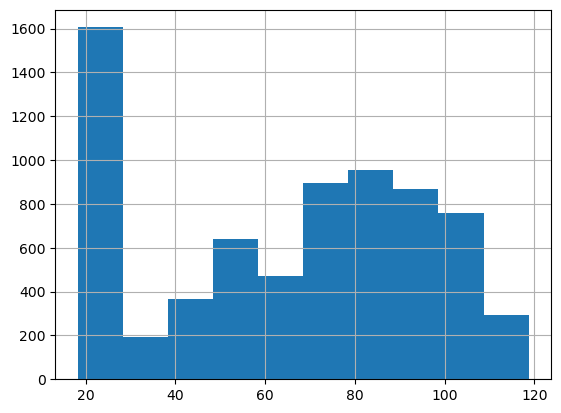

In [26]:
df.monthly_charges.hist();

In [27]:
α = .05

**$H_0$:** The is no linear relationship between monthly charges & tenure

**$H_1$:** The is a linear relationship between monthly charges & tenure

In [28]:
r, p = stats.pearsonr(df.tenure,df.monthly_charges)
r,p

(0.24789985628615246, 4.094044991476844e-99)

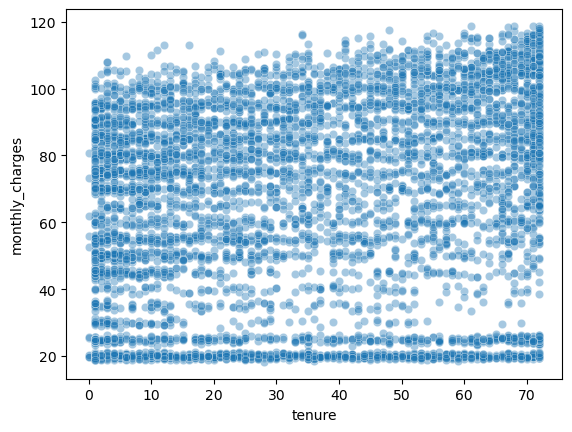

In [29]:
sns.scatterplot(data=df,y=df.monthly_charges,x=df.tenure,alpha=.4);

In [30]:
if p < α:
    print('reject the null hypothesis')
else:
    print('failed to reject the null hypothesis')

reject the null hypothesis


> There is a linear relationship between tenure & monthly charges

* Total charges?

In [31]:
df['total_charges'] = df.total_charges.str.replace(' ','0.0').astype(float)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   customer_id               7043 non-null   object 
 2   gender                    7043 non-null   object 
 3   senior_citizen            7043 non-null   int64  
 4   partner                   7043 non-null   object 
 5   dependents                7043 non-null   object 
 6   tenure                    7043 non-null   int64  
 7   phone_service             7043 non-null   object 
 8   multiple_lines            7043 non-null   object 
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [33]:
α = .05

**$H_0$:** The is no linear relationship between total charges & tenure

**$H_1$:** The is a linear relationship between total charges & tenure

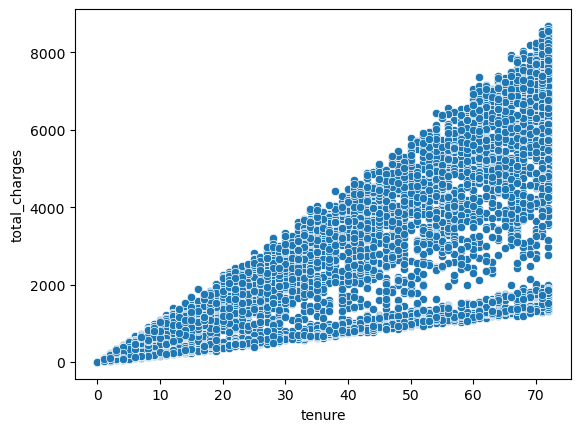

In [34]:
sns.scatterplot(data=df,x=df.tenure,y=df.total_charges);

In [35]:
r, p = stats.pearsonr(df.tenure,df.total_charges)
r, p

(0.8261783979502481, 0.0)

In [36]:
if p < α:
    print('reject the null hypothesis')
else:
    print('failed to reject the null hypothesis')

reject the null hypothesis


> There is a STRONG linear relationship between tenure & total charges

* What happens if you control for phone and internet service?

In [41]:
def run_pearsonr(df):
    r,p = stats.pearsonr(df.monthly_charges,df.tenure)
    return pd.Series((r,p))

In [42]:
df.groupby(['phone_service','internet_service_type']).apply(run_pearsonr)

0              1
phone_service internet_service_type                         
No            DSL                    0.585760   4.603370e-64
Yes           DSL                    0.655385  5.676203e-214
              Fiber optic            0.624621   0.000000e+00
              None                   0.342326   3.356187e-43

In [43]:
def run_pearsonr(df):
    r,p = stats.pearsonr(df.total_charges,df.tenure)
    return pd.Series((r,p))

In [44]:
df.groupby(['phone_service','internet_service_type']).apply(run_pearsonr)

0    1
phone_service internet_service_type               
No            DSL                    0.953570  0.0
Yes           DSL                    0.970593  0.0
              Fiber optic            0.985309  0.0
              None                   0.981567  0.0

### 3. Use the employees database.

In [45]:
url = get_db_url('employees')

query = '''
select *
 from employees
join salaries
using(emp_no)
where to_date > now();
'''

In [46]:
df = pd.read_sql(query, url)

* Is there a relationship between how long an employee has been with the company and their salary?

In [47]:
df['tenure_days'] = df.to_date - df.hire_date

In [48]:
df['tenure_days'] = df.tenure_days.astype('str').str.split(expand=True)[0]

In [49]:
df['tenure_days'] = df.tenure_days.astype(int)

**$H_0$:** The is no linear relationship between salary & tenure

**$H_1$:** The is a linear relationship between salary & tenure

In [50]:
α = 0.05

<Axes: xlabel='tenure_days', ylabel='salary'>

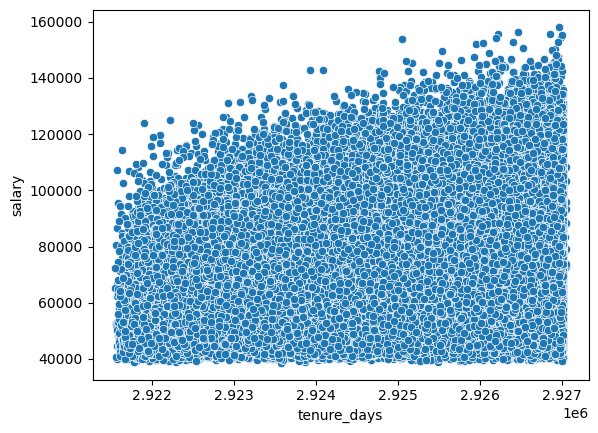

In [51]:
sns.scatterplot(data=df,x=df.tenure_days,y=df.salary)

In [52]:
r,p = stats.pearsonr(df.tenure_days,df.salary)
r,p

(0.30646256131860095, 0.0)

In [53]:
if p < α:
    print('reject the null hypothesis')
else:
    print('failed to reject the null hypothesis')

reject the null hypothesis


> There is a WEAK linear relationship between salary & tenure

* Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [54]:
query = '''
select emp_no, count(title) title_count, datediff(max(to_date),hire_date) tenure_days
from employees
join titles
	using (emp_no)
group by emp_no
having max(to_date) > now();
'''

In [55]:
df = pd.read_sql(query,url)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   emp_no       240124 non-null  int64
 1   title_count  240124 non-null  int64
 2   tenure_days  240124 non-null  int64
dtypes: int64(3)
memory usage: 5.5 MB


<Axes: xlabel='tenure_days', ylabel='title_count'>

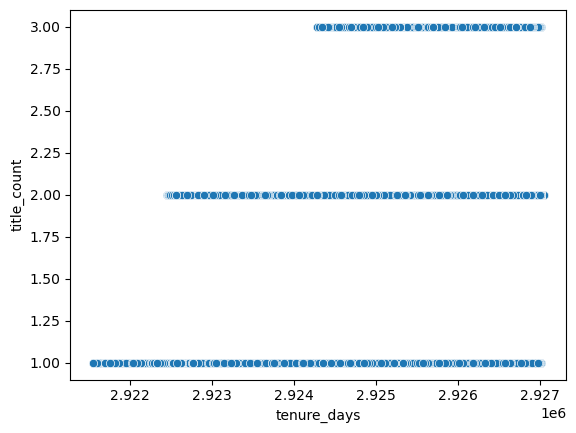

In [57]:
sns.scatterplot(data=df,x=df.tenure_days,y=df.title_count)

In [58]:
α = .05

**$H_0$:** The is no linear relationship between title count & tenure

**$H_a$:** The is a linear relationship between title count & tenure

In [59]:
r,p = stats.pearsonr(df.tenure_days,df.title_count)
r,p

(0.2871267889704716, 0.0)

In [60]:
r,p = stats.spearmanr(df.tenure_days,df.title_count)
r,p

(0.25489028077289544, 0.0)

In [62]:
if p < α:
    print('reject the null hypothesis')
else:
    print('failed to reject the null hypothesis')

reject the null hypothesis


>There is a weak linear relationship between title count & tenure

### 4. Use the sleepstudy data.

In [63]:
df = data('sleepstudy')
df

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


* Is there a relationship between days and reaction time?

<Axes: xlabel='Days', ylabel='Reaction'>

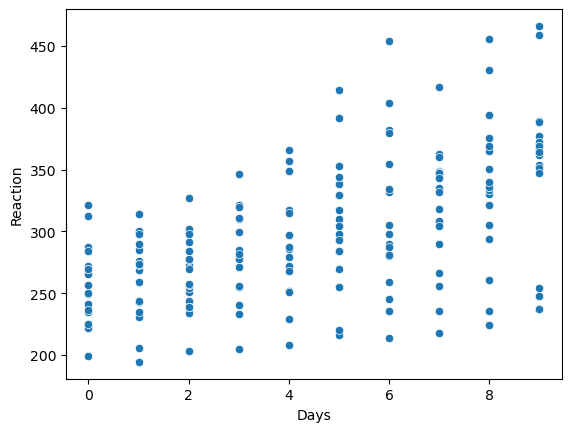

In [64]:
sns.scatterplot(data=df,x=df.Days,y=df.Reaction)

In [65]:
r,p = stats.pearsonr(df.Days,df.Reaction)
r,p

(0.5352302262650255, 9.894096322214486e-15)

**$H_0$:** The is no linear relationship between days & reaction time

**$H_a$:** The is a linear relationship between days & reaction time

In [66]:
α = .05

In [67]:
if p < α:
    print('reject the null hypothesis')
else:
    print('failed to reject the null hypothesis')

reject the null hypothesis


> There is a moderate linear relationship between days & reaction time

# Comparing Means

### 1. Answer with the type of test you would use (assume normal distribution):

* Is there a difference in grades of students on the second floor compared to grades of all students?

>one-sample / 2-tailed test

* Are adults who drink milk taller than adults who don't drink milk?

>two-sample / 1-tailed test

* Is the price of gas higher in Texas or in New Mexico?

>two-sample / 1-tailed test

* Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

>ANOVA

### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

* $H_0$: The average time it takes to sell homes is the same for office #1 & office #2
* $H_a$: The average time it takes to sell homes is different for the two offices

In [68]:
nobs_one = 40
nobs_two = 50
μ_one = 90
μ_two = 100
σ_one = 15
σ_two = 20
α = .05

In [70]:
t,p = stats.ttest_ind_from_stats(μ_one,σ_one,nobs_one,μ_two,σ_two,nobs_two)
t,p

(-2.6252287036468456, 0.01020985244923939)

In [8]:
if p < α:
    print('reject the null hypothesis')
else:
    print('failed to reject the null hypothesis')

reject the null hypothesis


> We have concluded that the average time it takes to sell homes is different between the two offices 

### 3. Load the mpg dataset and use it to answer the following questions:

In [71]:
df = data('mpg')

**Is there a difference in fuel-efficiency in cars from 2008 vs 1999?**

* $H_0$: there is no difference in fuel-efficiency between 1999 & 2008
* $H_a$: there is a difference in fuel-efficiency between 1999 & 2008

In [89]:
df['avg_mileage'] = (df.cty + df.hwy)/2
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


* $H_0$: The distributions are normal
* $H_a$: The distributions are not normally distributed

In [90]:
α = .05

In [91]:
year_2008 = df[df.year == 2008].avg_mileage
year_1999 = df[df.year == 1999].avg_mileage

In [92]:
t_2008, p_2008 = stats.shapiro(year_2008)
t_1999, p_1999 = stats.shapiro(year_1999)

In [93]:
if p_2008 < α:
    print('Reject the null hypothesis!')
else:
    print('Failed to reject the null hypothesis!')

Reject the null hypothesis!


In [94]:
if p_1999 < α:
    print('Reject the null hypothesis!')
else:
    print('Failed to reject the null hypothesis!')

Reject the null hypothesis!


> **The distributions are not normally distributed**

* $H_0$: There is equal variance in our two samples
* $H_a$: There is an inequality of variance in our two samples

In [95]:
α = .05

In [96]:
t, p = stats.levene(year_2008, year_1999)

In [97]:
if p < α:
    print('Reject the null hypothesis!')
else:
    print('Failed to reject the null hypothesis!')

Failed to reject the null hypothesis!


> **There is equal variance in our two samples**

In [81]:
year_2008.shape, year_1999.shape, df.shape

((117,), (117,), (234, 12))

> **They are independent**

In [84]:
t, p = stats.ttest_ind(year_1999, year_2008)
t,p

(0.21960177245940962, 0.8263744040323578)

In [47]:
if p < α:
    print('Reject the null hypothesis!')
else:
    print('Failed to reject the null hypothesis!')

Failed to reject the null hypothesis!


> $H_0$: there is no difference in fuel-efficiency between 1999 & 2008

In [51]:
t,p = stats.mannwhitneyu(year_2008, year_1999)
t,p

(7010.5, 0.7489868536015144)

In [49]:
if p < α:
    print('Reject the null hypothesis!')
else:
    print('Failed to reject the null hypothesis!')

Failed to reject the null hypothesis!


**Are compact cars more fuel-efficient than the average car?**

* $H_0$: There is no difference in fuel-efficiency between compact cars & the average car
* $H_a$: There is a difference in fuel-efficiency between compact cars & the average car

In [71]:
μ_th = df.avg_mileage.mean()
μ_th

20.14957264957265

In [72]:
compact = df[df['class'] == 'compact'].avg_mileage

In [73]:
α = .05

In [74]:
t,p = stats.ttest_1samp(compact, μ_th)
t,p

(7.896888573132533, 4.1985637943171486e-10)

In [75]:
if p < α:
    print('Reject the null hypothesis!')
else:
    print('Failed to reject the null hypothesis!')

Reject the null hypothesis!


> $H_a$: There is a difference in fuel-efficiency between compact cars & the average car

**Do manual cars get better gas mileage than automatic cars?**

* $H_0$: manual cars get less than or equal to the gas mileage of automatic cars
* $H_a$: manual cars get better gas milege than automatic cars

In [78]:
df.loc[:, 'is_automatic'] = np.where(df.trans.str.startswith('a'), 'auto', 'manual')

In [90]:
automatic = df[df.is_automatic == 'auto'].avg_mileage
manual = df[df.is_automatic == 'manual'].avg_mileage

* $H_0$: The distributions are normal
* $H_a$: The distributions are not normally distributed

In [93]:
t_auto, p_auto = stats.shapiro(automatic)
t_manual, p_manual = stats.shapiro(manual)

In [94]:
if p_auto < α:
    print('Reject the null hypothesis!')
else:
    print('Failed to reject the null hypothesis!')

Reject the null hypothesis!


In [95]:
if p_manual < α:
    print('Reject the null hypothesis!')
else:
    print('Failed to reject the null hypothesis!')

Reject the null hypothesis!


>**$H_a$: The distributions are not normally distributed**

* $H_0$: There is equal variance in our two samples
* $H_a$: There is an inequality of variance in our two samples

In [ ]:
α = .05

In [96]:
t, p = stats.levene(automatic,manual)

In [98]:
if p < α:
    print('Reject the null hypothesis!')
else:
    print('Failed to reject the null hypothesis!')

Failed to reject the null hypothesis!


>**$H_0$: There is equal variance in our two samples**

In [100]:
df.shape,automatic.shape,manual.shape

((234, 13), (157,), (77,))

> **They are independent.**

In [102]:
t, p = stats.ttest_ind(automatic, manual)
t,p

(-4.593437735750014, 7.154374401145685e-06)

In [103]:
if p < α:
    print('Reject the null hypothesis!')
else:
    print('Failed to reject the null hypothesis!')

Reject the null hypothesis!


> **$H_a$: manual cars get better gas milege than automatic cars**

In [105]:
t,p = stats.mannwhitneyu(automatic, manual)
t,p

(3895.5, 9.859599786061749e-06)

In [106]:
if p < α:
    print('Reject the null hypothesis!')
else:
    print('Failed to reject the null hypothesis!')

Reject the null hypothesis!


> **$H_a$: manual cars get better gas milege than automatic cars**